In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
#in figure b, four jobs are launched in parallel. 
#Number of nodes per job is changing
#32 cpu VMs 

In [4]:
vms_per_job=[1,2,4]

In [5]:
fig_b_path = "./experiment_data/FigureB/confinement/confinement_c_parellel_32_{vms_per_job}_4.dat".format(vms_per_job=vms_per_job)

In [47]:
confin_times = [8621, 6723, 9842]
confin_fails=[1, 0, 15]
shapes_times = [7805, 6723, 4658]
shapes_fails=[1, 0, 1]

In [97]:
def plot_vm_scaling(vms_per_job, jobs, times):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    fig.set_size_inches(4,4)
    ax.plot(vms_per_job, np.array(times[0])/3600.0, marker='*',color='r', label=jobs[0])
    ax.plot(vms_per_job, np.array(times[1])/3060.0, marker='o',color='k', label=jobs[1])
    total_cpus=[32*4*i for i in vms_per_job]

    ax.set_xticks(vms_per_job)
    ax.set_xticklabels(total_cpus)
    ax.set_xlim((0.9,4.1))
    ax.set_ylim((0))
    ax.legend(loc='best')
    ax.set_xlabel("Cluster size (# CPUs)")
    ax.set_ylabel("Total time (hours)")
    plt.savefig("../graphs/vm-per-job-scaling.pdf",bbox_inches='tight')

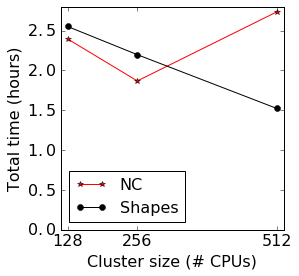

In [98]:
plot_vm_scaling(vms_per_job, ['NC','Shapes'], [confin_times, shapes_times])

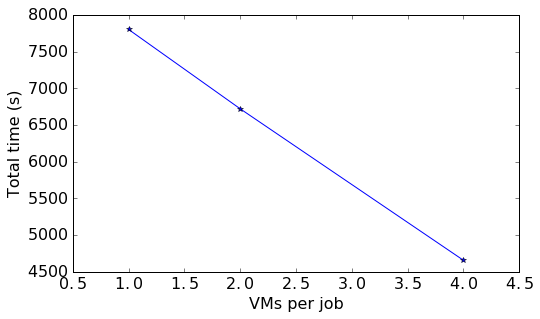

In [28]:
plot_vm_scaling(vms_per_job, shapes_times, shapes_fails)

In [39]:
#again, highcpu-32 used, but total cluster size is constant and equal to 32*8 CPUs = 256
par_jobs=[1,2,8]

In [40]:
fig_c_path = "./experiment_data/FigureC/confinement/confinement_c_parellel_32_{par_jobs}_4.dat".format(par_jobs=par_jobs)

In [42]:
#40 jobs completed in 32_1_8 ? 32 at 4214
confin_c_times=[4214, 6908, 20983]
confin_c_fails=[]
shapes_c_times=[3597, 5183, 18545]
shapes_c_fails=[]

In [123]:
def plot_par_scaling(par_jobs, jobs, times):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    fig.set_size_inches(4,4)
    ax.plot(par_jobs, np.array(times[0])/3600.0, marker='*',color='r', label=jobs[0])
    ax.plot(par_jobs, np.array(times[1])/3060.0, marker='o',color='k', label=jobs[1])

    ax.set_ylim((0))
    ax.set_xlabel("CPUs per Job \n (Total #CPUs=256)")
    ax.set_ylabel("Total time (hours)")
    ax.legend(loc='best')
    ax.set_xlim((0.5,8.5))
    ax.set_xticks(par_jobs)
    ax.set_xticklabels([32*i for i in par_jobs])
    plt.savefig("../graphs/par-scaling.pdf", bbox_inches='tight')

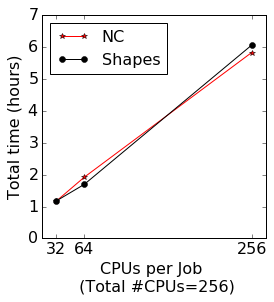

In [126]:
plot_par_scaling(np.array(par_jobs), ['NC','Shapes'], [confin_c_times, shapes_c_times])

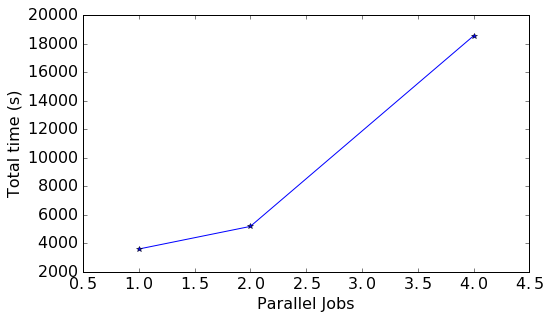

In [45]:
plot_par_scaling(par_jobs, shapes_c_times, confin_c_fails)

In [ ]:
def plot_vm_scaling(vms_per_job, times, fails):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    fig.set_size_inches(8,4.6)
    ax.plot(vms_per_job, times, marker='*')
    ax.set_xlim((0.5,4.5))
    ax.set_xlabel("VMs per job")
    ax.set_ylabel("Total time (s)")